In [2]:
import os
from pathlib import Path
from tqdm.autonotebook import tqdm
import json

import matplotlib.pyplot as plt
import cv2

root_directory = Path("../data")
images_directory = root_directory / "images"
annots_directory =  root_directory / "annotations"
bbox_directory =  root_directory / "annotations-bbox"
masks_directory =  root_directory / "annotations-seg"

In [3]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

path_to_coco_json = annots_directory / "modanet_coco.json"

register_coco_instances('modanet_instance_segmentation', {}, path_to_coco_json, images_directory)

MetadataCatalog.get('modanet_instance_segmentation').set(thing_classes=['bag', 'belt', 'boots', 'footwear', 'outer', 'dress', 'sunglasses', 'pants', 'top', 'shorts', 'skirt', 'headwear', 'scarf'])

namespace(name='modanet_instance_segmentation',
          json_file=PosixPath('../data/annotations/modanet_coco.json'),
          image_root=PosixPath('../data/images'),
          evaluator_type='coco',
          thing_classes=['bag',
                         'belt',
                         'boots',
                         'footwear',
                         'outer',
                         'dress',
                         'sunglasses',
                         'pants',
                         'top',
                         'shorts',
                         'skirt',
                         'headwear',
                         'scarf'])

In [4]:
modanet_metadata =  MetadataCatalog.get("modanet_instance_segmentation")
modanet_metadata

namespace(name='modanet_instance_segmentation',
          json_file=PosixPath('../data/annotations/modanet_coco.json'),
          image_root=PosixPath('../data/images'),
          evaluator_type='coco',
          thing_classes=['bag',
                         'belt',
                         'boots',
                         'footwear',
                         'outer',
                         'dress',
                         'sunglasses',
                         'pants',
                         'top',
                         'shorts',
                         'skirt',
                         'headwear',
                         'scarf'])

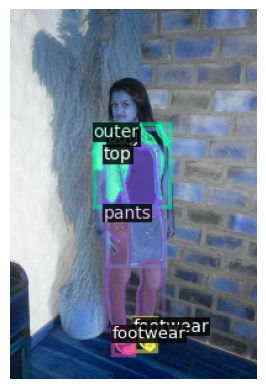

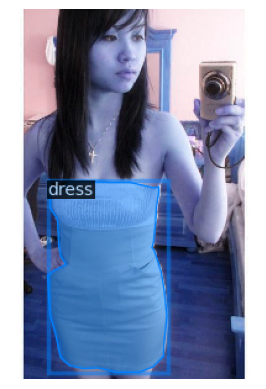

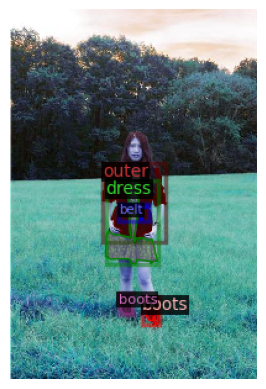

In [5]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data.datasets import load_coco_json
import random

dataset_dicts = load_coco_json("../data/annotations/modanet_coco.json", "../data/images/")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=modanet_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.axis("off")
    plt.show()

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.config import get_cfg
from detectron2 import model_zoo

model_yaml_path = 'COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'
model_weights_path = 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_yaml_path))
cfg.DATASETS.TRAIN = ('modanet_instance_segmentation_train',)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_weights_path # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 10    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

In [ ]:
from detectron2.engine import DefaultTrainer

cfg.OUTPUT_DIR = '../logs/tests_d2'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()